<a href="https://colab.research.google.com/github/jrebull/MIAAD_Mate/blob/main/MIAAD_Mate_Week11_Proba_ejercicios_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios 1, 2 y 3: Distribuciones de Probabilidad

**Alumno:** Javier Augusto Rebull Saucedo  
**Matrícula:** al263483  
**Materia:** Matemáticas y Estadística para Inteligencia Artificial  
**Profesora:** Dra. Helen Clara Peñate Rodríguez  

Este notebook contiene la verificación computacional de los ejercicios 1, 2 y 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import comb
import pandas as pd

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
np.random.seed(42)

## Ejercicio 1: Audiencia Televisiva (Distribución Binomial)

El 10% de la población ve un concurso en Canal 44. Se llama a 12 personas al azar.

In [2]:
# Parámetros
n1 = 12
p1 = 0.10
q1 = 1 - p1

print("="*70)
print("EJERCICIO 1: AUDIENCIA TELEVISIVA")
print("="*70)
print(f"n = {n1} personas")
print(f"p = {p1} (probabilidad de ver el programa)")
print(f"q = {q1} (probabilidad de no ver el programa)")
print()

# Crear distribución binomial
rv1 = stats.binom(n1, p1)

# Parte (a): Más de 8 personas
prob_mas_8 = rv1.sf(8)  # P(X > 8) = 1 - P(X <= 8)
print(f"a) P(X > 8) = {prob_mas_8:.10f}")
print(f"   Prácticamente imposible")

# Parte (b): Algunas personas (al menos 1)
prob_al_menos_1 = 1 - rv1.pmf(0)
print(f"\nb) P(X >= 1) = {prob_al_menos_1:.6f}")
print(f"   Porcentaje: {prob_al_menos_1*100:.2f}%")

# Parte (c): Media y desviación típica
media1 = n1 * p1
desv1 = np.sqrt(n1 * p1 * q1)
print(f"\nc) Media: μ = {media1:.2f} personas")
print(f"   Desviación típica: σ = {desv1:.4f} personas")
print("="*70)

EJERCICIO 1: AUDIENCIA TELEVISIVA
n = 12 personas
p = 0.1 (probabilidad de ver el programa)
q = 0.9 (probabilidad de no ver el programa)

a) P(X > 8) = 0.0000001658
   Prácticamente imposible

b) P(X >= 1) = 0.717570
   Porcentaje: 71.76%

c) Media: μ = 1.20 personas
   Desviación típica: σ = 1.0392 personas


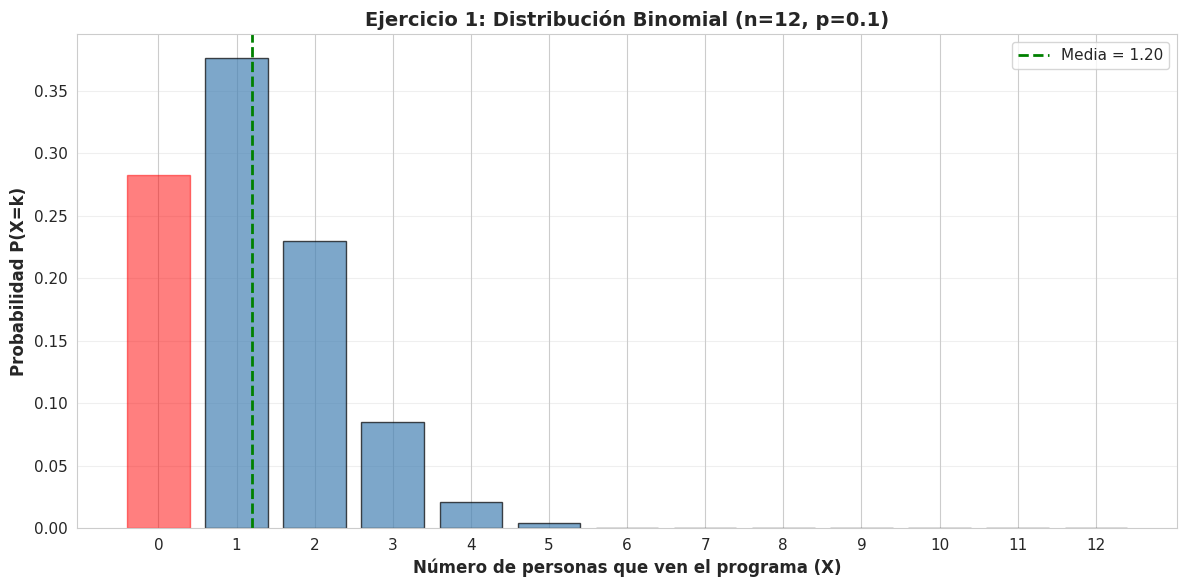

In [3]:
# Visualización Ejercicio 1
x1 = np.arange(0, n1+1)
pmf1 = rv1.pmf(x1)

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x1, pmf1, alpha=0.7, color='steelblue', edgecolor='black')

# Colorear barra de "al menos 1"
bars[0].set_color('red')
bars[0].set_alpha(0.5)

ax.set_xlabel('Número de personas que ven el programa (X)', fontsize=12, fontweight='bold')
ax.set_ylabel('Probabilidad P(X=k)', fontsize=12, fontweight='bold')
ax.set_title(f'Ejercicio 1: Distribución Binomial (n={n1}, p={p1})', fontsize=14, fontweight='bold')
ax.set_xticks(x1)
ax.grid(True, alpha=0.3, axis='y')

# Líneas de referencia
ax.axvline(x=media1, color='green', linestyle='--', linewidth=2, label=f'Media = {media1:.2f}')
ax.legend()

plt.tight_layout()
plt.savefig('ejercicio1_binomial.png', dpi=300, bbox_inches='tight')
plt.show()

## Ejercicio 2: Examen de Admisión (Distribución Binomial)

Cuestionario de 20 preguntas, cada una con 4 opciones (solo 1 correcta). Respuestas al azar.

In [4]:
# Parámetros
n2 = 20
p2 = 0.25
q2 = 1 - p2

print("\n" + "="*70)
print("EJERCICIO 2: EXAMEN DE ADMISIÓN")
print("="*70)
print(f"n = {n2} preguntas")
print(f"p = {p2} (probabilidad de acertar al azar)")
print(f"q = {q2} (probabilidad de fallar)")
print()

# Crear distribución binomial
rv2 = stats.binom(n2, p2)

# Parte (a): Todas mal
prob_todas_mal = rv2.pmf(0)
print(f"a) P(X = 0) = {prob_todas_mal:.6f}")
print(f"   Porcentaje: {prob_todas_mal*100:.4f}%")

# Parte (b): Al menos 10 bien
prob_al_menos_10 = rv2.sf(9)  # P(X >= 10) = 1 - P(X <= 9)
print(f"\nb) P(X >= 10) = {prob_al_menos_10:.6f}")
print(f"   Porcentaje: {prob_al_menos_10*100:.4f}%")

# Parte (c): Entre 5 y 8
prob_entre_5_8 = rv2.cdf(8) - rv2.cdf(4)
print(f"\nc) P(5 <= X <= 8) = {prob_entre_5_8:.6f}")
print(f"   Porcentaje: {prob_entre_5_8*100:.4f}%")

# Parte (d): Menos de 3
prob_menos_3 = rv2.cdf(2)  # P(X < 3) = P(X <= 2)
print(f"\nd) P(X < 3) = {prob_menos_3:.6f}")
print(f"   Porcentaje: {prob_menos_3*100:.4f}%")

print("\nMedia y Desviación:")
media2 = n2 * p2
desv2 = np.sqrt(n2 * p2 * q2)
print(f"Media: μ = {media2:.2f} preguntas correctas")
print(f"Desviación típica: σ = {desv2:.4f} preguntas")
print("="*70)


EJERCICIO 2: EXAMEN DE ADMISIÓN
n = 20 preguntas
p = 0.25 (probabilidad de acertar al azar)
q = 0.75 (probabilidad de fallar)

a) P(X = 0) = 0.003171
   Porcentaje: 0.3171%

b) P(X >= 10) = 0.013864
   Porcentaje: 1.3864%

c) P(5 <= X <= 8) = 0.544233
   Porcentaje: 54.4233%

d) P(X < 3) = 0.091260
   Porcentaje: 9.1260%

Media y Desviación:
Media: μ = 5.00 preguntas correctas
Desviación típica: σ = 1.9365 preguntas


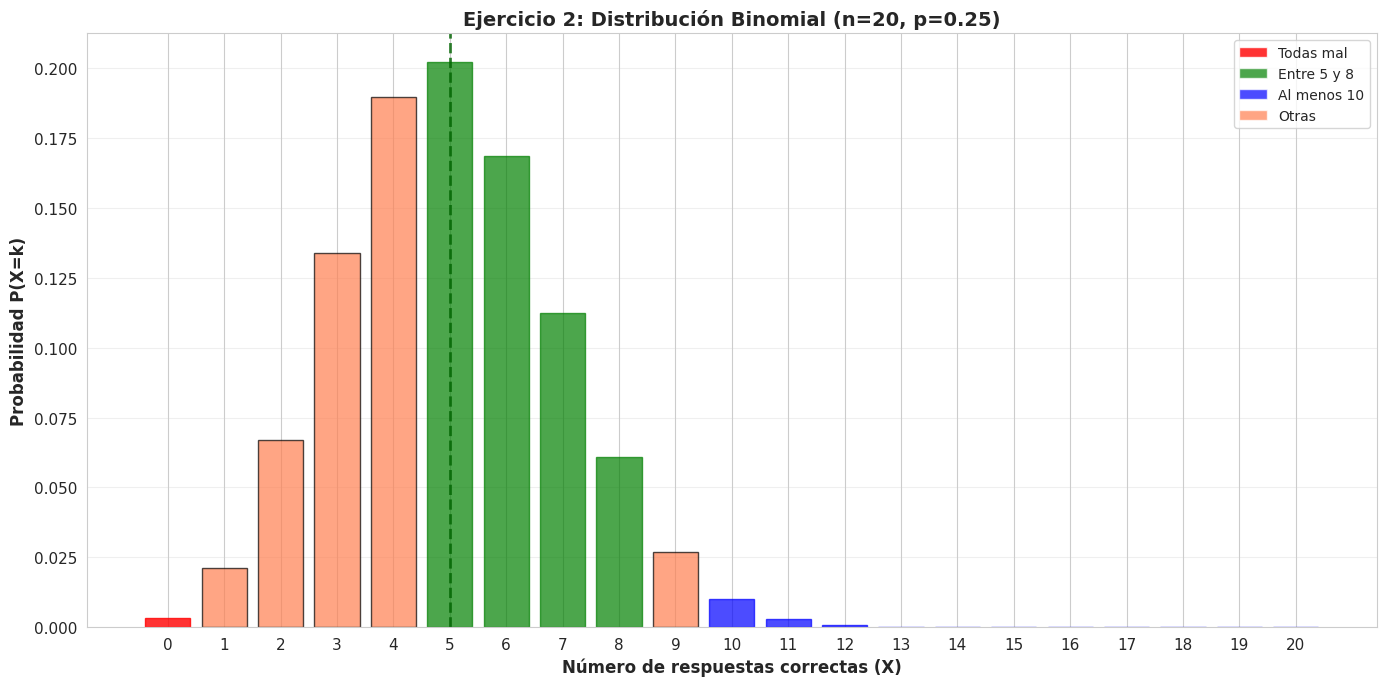

In [5]:
# Visualización Ejercicio 2
x2 = np.arange(0, n2+1)
pmf2 = rv2.pmf(x2)

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(x2, pmf2, alpha=0.7, color='coral', edgecolor='black')

# Colorear regiones de interés
bars[0].set_color('red')  # Todas mal
bars[0].set_alpha(0.8)

for i in range(5, 9):  # Entre 5 y 8
    bars[i].set_color('green')
    bars[i].set_alpha(0.7)

for i in range(10, len(bars)):  # Al menos 10
    bars[i].set_color('blue')
    bars[i].set_alpha(0.7)

ax.set_xlabel('Número de respuestas correctas (X)', fontsize=12, fontweight='bold')
ax.set_ylabel('Probabilidad P(X=k)', fontsize=12, fontweight='bold')
ax.set_title(f'Ejercicio 2: Distribución Binomial (n={n2}, p={p2})', fontsize=14, fontweight='bold')
ax.set_xticks(x2)
ax.grid(True, alpha=0.3, axis='y')

# Leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.8, label='Todas mal'),
    Patch(facecolor='green', alpha=0.7, label='Entre 5 y 8'),
    Patch(facecolor='blue', alpha=0.7, label='Al menos 10'),
    Patch(facecolor='coral', alpha=0.7, label='Otras')
]
ax.legend(handles=legend_elements, fontsize=10)

# Línea de media
ax.axvline(x=media2, color='darkgreen', linestyle='--', linewidth=2, alpha=0.8)

plt.tight_layout()
plt.savefig('ejercicio2_binomial.png', dpi=300, bbox_inches='tight')
plt.show()

## Ejercicio 3: Selección de Comité (Distribución Hipergeométrica)

De un grupo de 5 hombres y 10 mujeres, se selecciona aleatoriamente un comité de 5 personas.

In [6]:
# Parámetros
M = 15  # Población total
n3 = 5  # Tamaño del comité
N_hombres = 5
N_mujeres = 10

print("\n" + "="*70)
print("EJERCICIO 3: SELECCIÓN DE COMITÉ")
print("="*70)
print(f"Población total: {M} personas ({N_hombres} hombres + {N_mujeres} mujeres)")
print(f"Tamaño del comité: {n3} personas")
print()

# Parte (a): 2 hombres y 3 mujeres
# P(H=2, M=3) = C(5,2) * C(10,3) / C(15,5)
numerador_a = comb(N_hombres, 2, exact=True) * comb(N_mujeres, 3, exact=True)
denominador_a = comb(M, n3, exact=True)
prob_2h_3m = numerador_a / denominador_a

print(f"a) P(2 hombres y 3 mujeres):")
print(f"   C(5,2) = {comb(N_hombres, 2, exact=True)}")
print(f"   C(10,3) = {comb(N_mujeres, 3, exact=True)}")
print(f"   C(15,5) = {comb(M, n3, exact=True)}")
print(f"   P = {numerador_a} / {denominador_a} = {prob_2h_3m:.6f}")
print(f"   Porcentaje: {prob_2h_3m*100:.2f}%")

# Parte (b): Sólo mujeres
# P(H=0, M=5) = C(5,0) * C(10,5) / C(15,5)
numerador_b = comb(N_hombres, 0, exact=True) * comb(N_mujeres, 5, exact=True)
denominador_b = comb(M, n3, exact=True)
prob_solo_mujeres = numerador_b / denominador_b

print(f"\nb) P(sólo mujeres):")
print(f"   C(5,0) = {comb(N_hombres, 0, exact=True)}")
print(f"   C(10,5) = {comb(N_mujeres, 5, exact=True)}")
print(f"   C(15,5) = {comb(M, n3, exact=True)}")
print(f"   P = {numerador_b} / {denominador_b} = {prob_solo_mujeres:.6f}")
print(f"   Porcentaje: {prob_solo_mujeres*100:.2f}%")
print("="*70)


EJERCICIO 3: SELECCIÓN DE COMITÉ
Población total: 15 personas (5 hombres + 10 mujeres)
Tamaño del comité: 5 personas

a) P(2 hombres y 3 mujeres):
   C(5,2) = 10
   C(10,3) = 120
   C(15,5) = 3003
   P = 1200 / 3003 = 0.399600
   Porcentaje: 39.96%

b) P(sólo mujeres):
   C(5,0) = 1
   C(10,5) = 252
   C(15,5) = 3003
   P = 252 / 3003 = 0.083916
   Porcentaje: 8.39%


In [7]:
# Calcular todas las probabilidades posibles
composiciones = []
for h in range(0, min(N_hombres, n3) + 1):
    m = n3 - h
    if m <= N_mujeres:
        prob = (comb(N_hombres, h, exact=True) * comb(N_mujeres, m, exact=True)) / comb(M, n3, exact=True)
        composiciones.append({
            'Hombres': h,
            'Mujeres': m,
            'Probabilidad': prob,
            'Porcentaje': prob * 100
        })

df_comite = pd.DataFrame(composiciones)

print("\nTodas las composiciones posibles del comité:")
print("="*70)
print(df_comite.to_string(index=False))
print("="*70)
print(f"Suma de probabilidades: {df_comite['Probabilidad'].sum():.6f}")


Todas las composiciones posibles del comité:
 Hombres  Mujeres  Probabilidad  Porcentaje
       0        5      0.083916    8.391608
       1        4      0.349650   34.965035
       2        3      0.399600   39.960040
       3        2      0.149850   14.985015
       4        1      0.016650    1.665002
       5        0      0.000333    0.033300
Suma de probabilidades: 1.000000


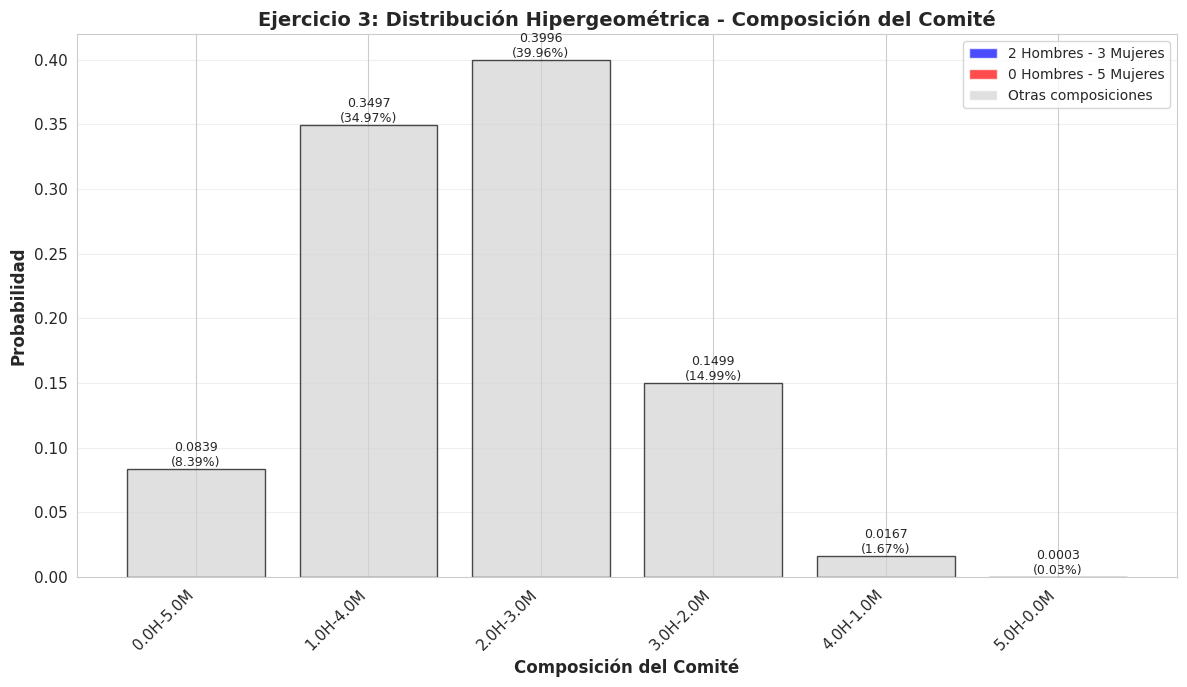

In [8]:
# Visualización Ejercicio 3
fig, ax = plt.subplots(figsize=(12, 7))

x_labels = [f"{row['Hombres']}H-{row['Mujeres']}M" for _, row in df_comite.iterrows()]
x_pos = np.arange(len(x_labels))
probs = df_comite['Probabilidad'].values

# Colorear barras específicas
colors = ['blue' if '2H-3M' in label else 'red' if '0H-5M' in label else 'lightgray'
          for label in x_labels]

bars = ax.bar(x_pos, probs, color=colors, alpha=0.7, edgecolor='black')

ax.set_xlabel('Composición del Comité', fontsize=12, fontweight='bold')
ax.set_ylabel('Probabilidad', fontsize=12, fontweight='bold')
ax.set_title('Ejercicio 3: Distribución Hipergeométrica - Composición del Comité',
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.grid(True, alpha=0.3, axis='y')

# Añadir valores sobre las barras
for i, (bar, prob) in enumerate(zip(bars, probs)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{prob:.4f}\n({prob*100:.2f}%)',
            ha='center', va='bottom', fontsize=9)

# Leyenda
legend_elements = [
    Patch(facecolor='blue', alpha=0.7, label='2 Hombres - 3 Mujeres'),
    Patch(facecolor='red', alpha=0.7, label='0 Hombres - 5 Mujeres'),
    Patch(facecolor='lightgray', alpha=0.7, label='Otras composiciones')
]
ax.legend(handles=legend_elements, fontsize=10)

plt.tight_layout()
plt.savefig('ejercicio3_hipergeometrica.png', dpi=300, bbox_inches='tight')
plt.show()

## Verificación por Simulación

Verificaremos los resultados del Ejercicio 3 mediante simulación de Monte Carlo.

In [9]:
def simular_comite(n_simulaciones=100000):
    """
    Simula la selección de comités y cuenta las composiciones.
    """
    # Población: 0-4 = hombres, 5-14 = mujeres
    poblacion = np.array([0]*5 + [1]*10)  # 0=hombre, 1=mujer

    resultados = {'2H-3M': 0, '0H-5M': 0}

    for _ in range(n_simulaciones):
        comite = np.random.choice(poblacion, size=5, replace=False)
        n_mujeres = np.sum(comite)
        n_hombres = 5 - n_mujeres

        if n_hombres == 2 and n_mujeres == 3:
            resultados['2H-3M'] += 1
        elif n_hombres == 0 and n_mujeres == 5:
            resultados['0H-5M'] += 1

    return resultados, n_simulaciones

# Ejecutar simulación
N_sim = 100000
print(f"\nEjecutando {N_sim:,} simulaciones...")
resultados_sim, n_total = simular_comite(N_sim)

prob_2h3m_sim = resultados_sim['2H-3M'] / n_total
prob_0h5m_sim = resultados_sim['0H-5M'] / n_total

print("\n" + "="*70)
print("VERIFICACIÓN POR SIMULACIÓN (EJERCICIO 3)")
print("="*70)

print(f"\nP(2 hombres, 3 mujeres):")
print(f"  Teórica:      {prob_2h_3m:.6f}")
print(f"  Experimental: {prob_2h3m_sim:.6f}")
print(f"  Error:        {abs(prob_2h_3m - prob_2h3m_sim):.6f}")
print(f"  Error rel.:   {abs(prob_2h_3m - prob_2h3m_sim)/prob_2h_3m*100:.4f}%")

print(f"\nP(0 hombres, 5 mujeres):")
print(f"  Teórica:      {prob_solo_mujeres:.6f}")
print(f"  Experimental: {prob_0h5m_sim:.6f}")
print(f"  Error:        {abs(prob_solo_mujeres - prob_0h5m_sim):.6f}")
print(f"  Error rel.:   {abs(prob_solo_mujeres - prob_0h5m_sim)/prob_solo_mujeres*100:.4f}%")

print("="*70)


Ejecutando 100,000 simulaciones...

VERIFICACIÓN POR SIMULACIÓN (EJERCICIO 3)

P(2 hombres, 3 mujeres):
  Teórica:      0.399600
  Experimental: 0.401710
  Error:        0.002110
  Error rel.:   0.5279%

P(0 hombres, 5 mujeres):
  Teórica:      0.083916
  Experimental: 0.084410
  Error:        0.000494
  Error rel.:   0.5886%


## Resumen de Todos los Ejercicios

In [10]:
# Crear tabla resumen
resumen_data = [
    ['Ejercicio 1a', 'Más de 8 ven TV', f'{prob_mas_8:.10f}', 'Prácticamente imposible'],
    ['Ejercicio 1b', 'Al menos 1 ve TV', f'{prob_al_menos_1:.6f}', f'{prob_al_menos_1*100:.2f}%'],
    ['Ejercicio 2a', 'Todas mal', f'{prob_todas_mal:.6f}', f'{prob_todas_mal*100:.4f}%'],
    ['Ejercicio 2b', 'Al menos 10 bien', f'{prob_al_menos_10:.6f}', f'{prob_al_menos_10*100:.4f}%'],
    ['Ejercicio 2c', 'Entre 5 y 8 bien', f'{prob_entre_5_8:.6f}', f'{prob_entre_5_8*100:.4f}%'],
    ['Ejercicio 2d', 'Menos de 3 bien', f'{prob_menos_3:.6f}', f'{prob_menos_3*100:.4f}%'],
    ['Ejercicio 3a', '2H y 3M', f'{prob_2h_3m:.6f}', f'{prob_2h_3m*100:.2f}%'],
    ['Ejercicio 3b', 'Sólo mujeres', f'{prob_solo_mujeres:.6f}', f'{prob_solo_mujeres*100:.2f}%']
]

df_resumen = pd.DataFrame(resumen_data, columns=['Ejercicio', 'Descripción', 'Probabilidad', 'Porcentaje'])

print("\n" + "="*80)
print("RESUMEN DE RESULTADOS - EJERCICIOS 1, 2 Y 3")
print("="*80)
print(df_resumen.to_string(index=False))
print("="*80)


RESUMEN DE RESULTADOS - EJERCICIOS 1, 2 Y 3
   Ejercicio      Descripción Probabilidad              Porcentaje
Ejercicio 1a  Más de 8 ven TV 0.0000001658 Prácticamente imposible
Ejercicio 1b Al menos 1 ve TV     0.717570                  71.76%
Ejercicio 2a        Todas mal     0.003171                 0.3171%
Ejercicio 2b Al menos 10 bien     0.013864                 1.3864%
Ejercicio 2c Entre 5 y 8 bien     0.544233                54.4233%
Ejercicio 2d  Menos de 3 bien     0.091260                 9.1260%
Ejercicio 3a          2H y 3M     0.399600                  39.96%
Ejercicio 3b     Sólo mujeres     0.083916                   8.39%
